In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import numpy as np
from scipy.stats import spearmanr


counts_df = pd.read_csv("/content/drive/MyDrive/CMSC320/counts.csv")
weather_df = pd.read_csv("/content/drive/MyDrive/CMSC320/hw5_weather.csv")

In [ ]:
print(weather_df.columns)
print(weather_df.head())

weather_df = weather_df.drop("Unnamed: 0", axis = 1)
weather_df = weather_df.drop("Snow Depth", axis = 1)

weather_df.columns = ['date', 'max_temp', 'min_temp', 'avg_temp',
       'temp_departure', 'HDD', 'CDD', 'precipitation', 'new_snow']

weather_df.head()

Index(['Unnamed: 0', 'Date', 'max_temp', 'min_temp', 'avg_temp',
       'temp_departure', 'HDD', 'CDD', 'Precipitation', 'New Snow',
       'Snow Depth'],
      dtype='object')
   Unnamed: 0        Date  max_temp  min_temp  avg_temp  temp_departure   HDD  \
0           0  2025-01-27      46.0      19.0      32.5            -1.2  32.0   
1           1  2025-01-28      48.0      23.0      35.5             1.7  29.0   
2           2  2025-01-29      50.0      27.0      38.5             4.6  26.0   
3           3  2025-01-30      57.0      26.0      41.5             7.6  23.0   
4           4  2025-02-03      36.0      24.0      30.0            -4.3  35.0   

   CDD Precipitation New Snow Snow Depth  
0  0.0          0.00      0.0          0  
1  0.0          0.00      0.0          0  
2  0.0          0.00      0.0          0  
3  0.0          0.00      0.0          0  
4  0.0          0.00      0.0          0  


,date,max_temp,min_temp,avg_temp,temp_departure,HDD,CDD,precipitation,new_snow
0,2025-01-27,46.0,19.0,32.5,-1.2,32.0,0.0,0.00,0.0
1,2025-01-28,48.0,23.0,35.5,1.7,29.0,0.0,0.00,0.0
2,2025-01-29,50.0,27.0,38.5,4.6,26.0,0.0,0.00,0.0
3,2025-01-30,57.0,26.0,41.5,7.6,23.0,0.0,0.00,0.0
4,2025-02-03,36.0,24.0,30.0,-4.3,35.0,0.0,0.00,0.0


In [ ]:
df = pd.merge(left = counts_df, right = weather_df)
df['precipitation'] = df['precipitation'].apply(lambda x : 0.0 if x == 'T' else float(x))
df['new_snow'] = df['new_snow'].apply(lambda x : 0.0 if x == 'T' else float(x))
df

,date,count,type,max_temp,min_temp,avg_temp,temp_departure,HDD,CDD,precipitation,new_snow
0,2025-01-27,64,small,46.0,19.0,32.5,-1.2,32.0,0.0,0.00,0.0
1,2025-01-28,202,big,48.0,23.0,35.5,1.7,29.0,0.0,0.00,0.0
2,2025-01-29,65,small,50.0,27.0,38.5,4.6,26.0,0.0,0.00,0.0
3,2025-01-30,201,big,57.0,26.0,41.5,7.6,23.0,0.0,0.00,0.0
4,2025-02-03,64,small,36.0,24.0,30.0,-4.3,35.0,0.0,0.00,0.0
5,2025-02-04,188,big,51.0,28.0,39.5,5.1,25.0,0.0,0.00,0.0
6,2025-02-05,60,small,60.0,30.0,45.0,10.4,20.0,0.0,0.00,0.0
7,2025-02-06,135,big,39.0,32.0,35.5,0.8,29.0,0.0,0.54,0.2
8,2025-02-13,132,big,35.0,30.0,32.5,-3.3,32.0,0.0,0.27,0.0
9,2025-02-17,69,small,62.0,30.0,46.0,9.4,19.0,0.0,0.40,0.0


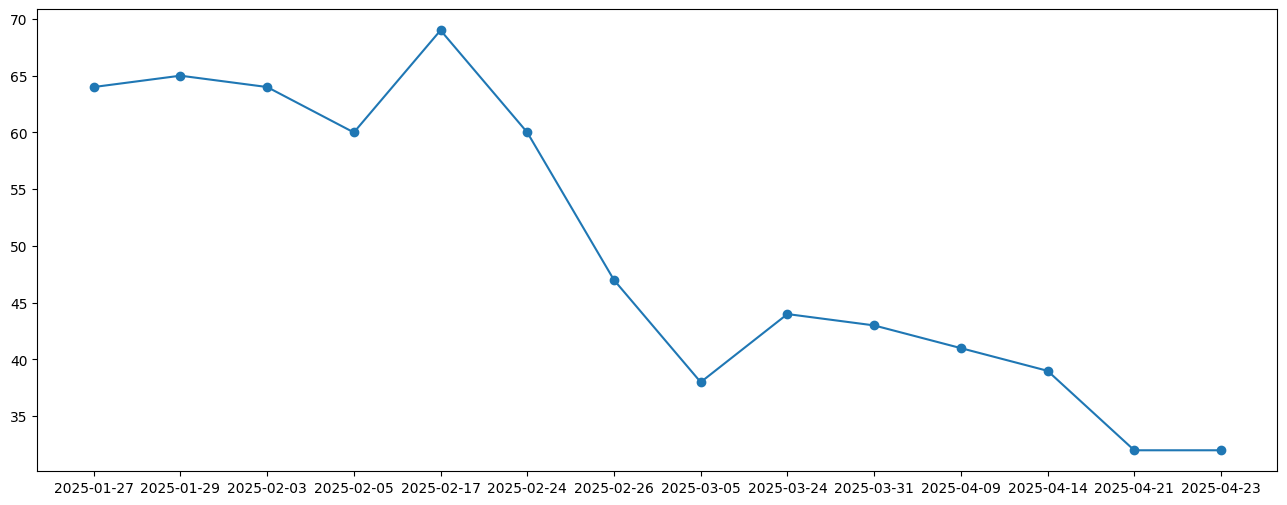

In [ ]:
mwdates = df['date'][df['type'] == 'small']
mwcounts = df['count'][df['type'] == 'small']
plt.figure(figsize=(16, 6))
plt.scatter(mwdates, mwcounts)
plt.plot(mwdates, mwcounts)

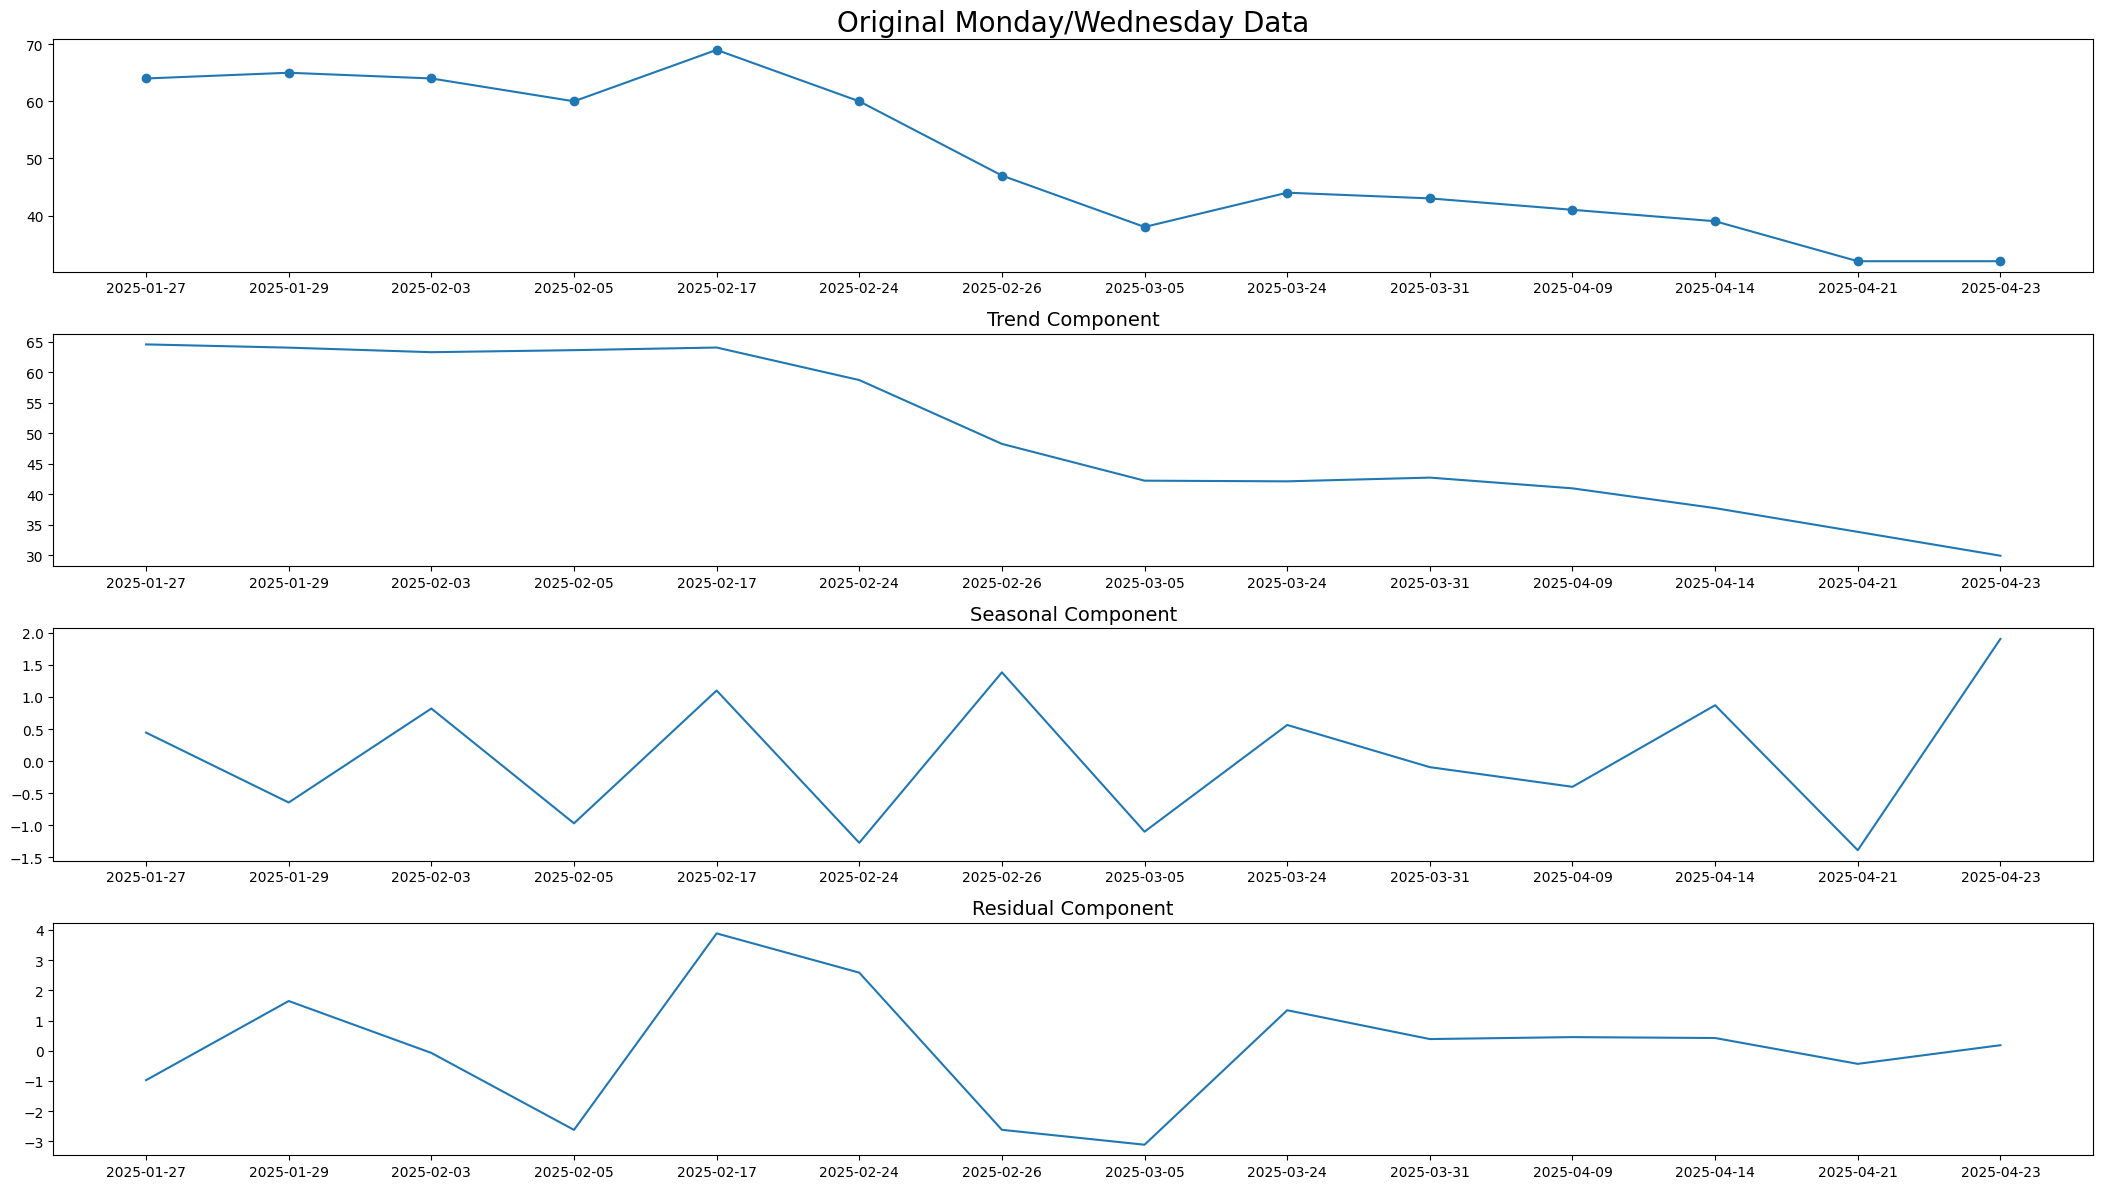

In [ ]:
mwstl = STL(mwcounts, period=2)
mwresult = mwstl.fit()

mwtrend = mwresult.trend
mwseasonal = mwresult.seasonal
mwresidual = mwresult.resid

plt.figure(figsize=(21, 12))
plt.subplot(4, 1, 1)
plt.plot(mwdates, mwcounts)
plt.scatter(mwdates, mwcounts)
plt.title('Original Monday/Wednesday Data', fontsize=20)
plt.subplot(4, 1, 2)
plt.plot(mwdates, mwtrend)
plt.title('Trend Component', fontsize=14)
plt.subplot(4, 1, 3)
plt.plot(mwdates, mwseasonal)
plt.title('Seasonal Component', fontsize=14)
plt.subplot(4, 1, 4)
plt.plot(mwdates, mwresidual)
plt.title('Residual Component', fontsize=14)
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '2025-01-28'),
  Text(1, 0, '2025-01-30'),
  Text(2, 0, '2025-02-04'),
  Text(3, 0, '2025-02-06'),
  Text(4, 0, '2025-02-13'),
  Text(5, 0, '2025-02-18'),
  Text(6, 0, '2025-02-20'),
  Text(7, 0, '2025-02-25'),
  Text(8, 0, '2025-02-27'),
  Text(9, 0, '2025-03-06'),
  Text(10, 0, '2025-03-11'),
  Text(11, 0, '2025-03-25'),
  Text(12, 0, '2025-03-27'),
  Text(13, 0, '2025-04-03'),
  Text(14, 0, '2025-04-08'),
  Text(15, 0, '2025-04-10'),
  Text(16, 0, '2025-04-22'),
  Text(17, 0, '2025-04-24')])

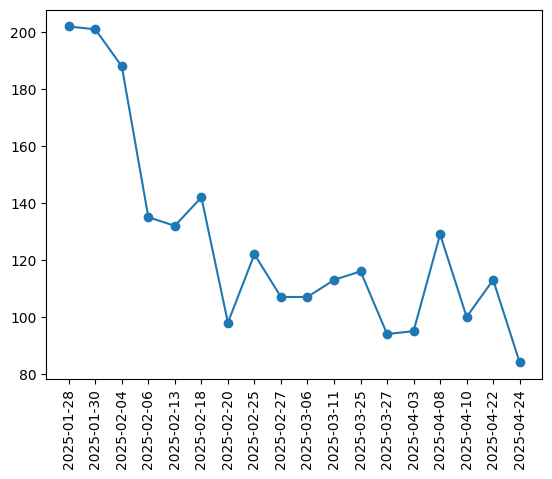

In [ ]:
# Tuesday Thursday
ttdates = df['date'][df['type'] == 'big']
ttcounts = df['count'][df['type'] == 'big']
plt.scatter(ttdates, ttcounts)
plt.plot(ttdates, ttcounts)
plt.xticks(rotation=90)

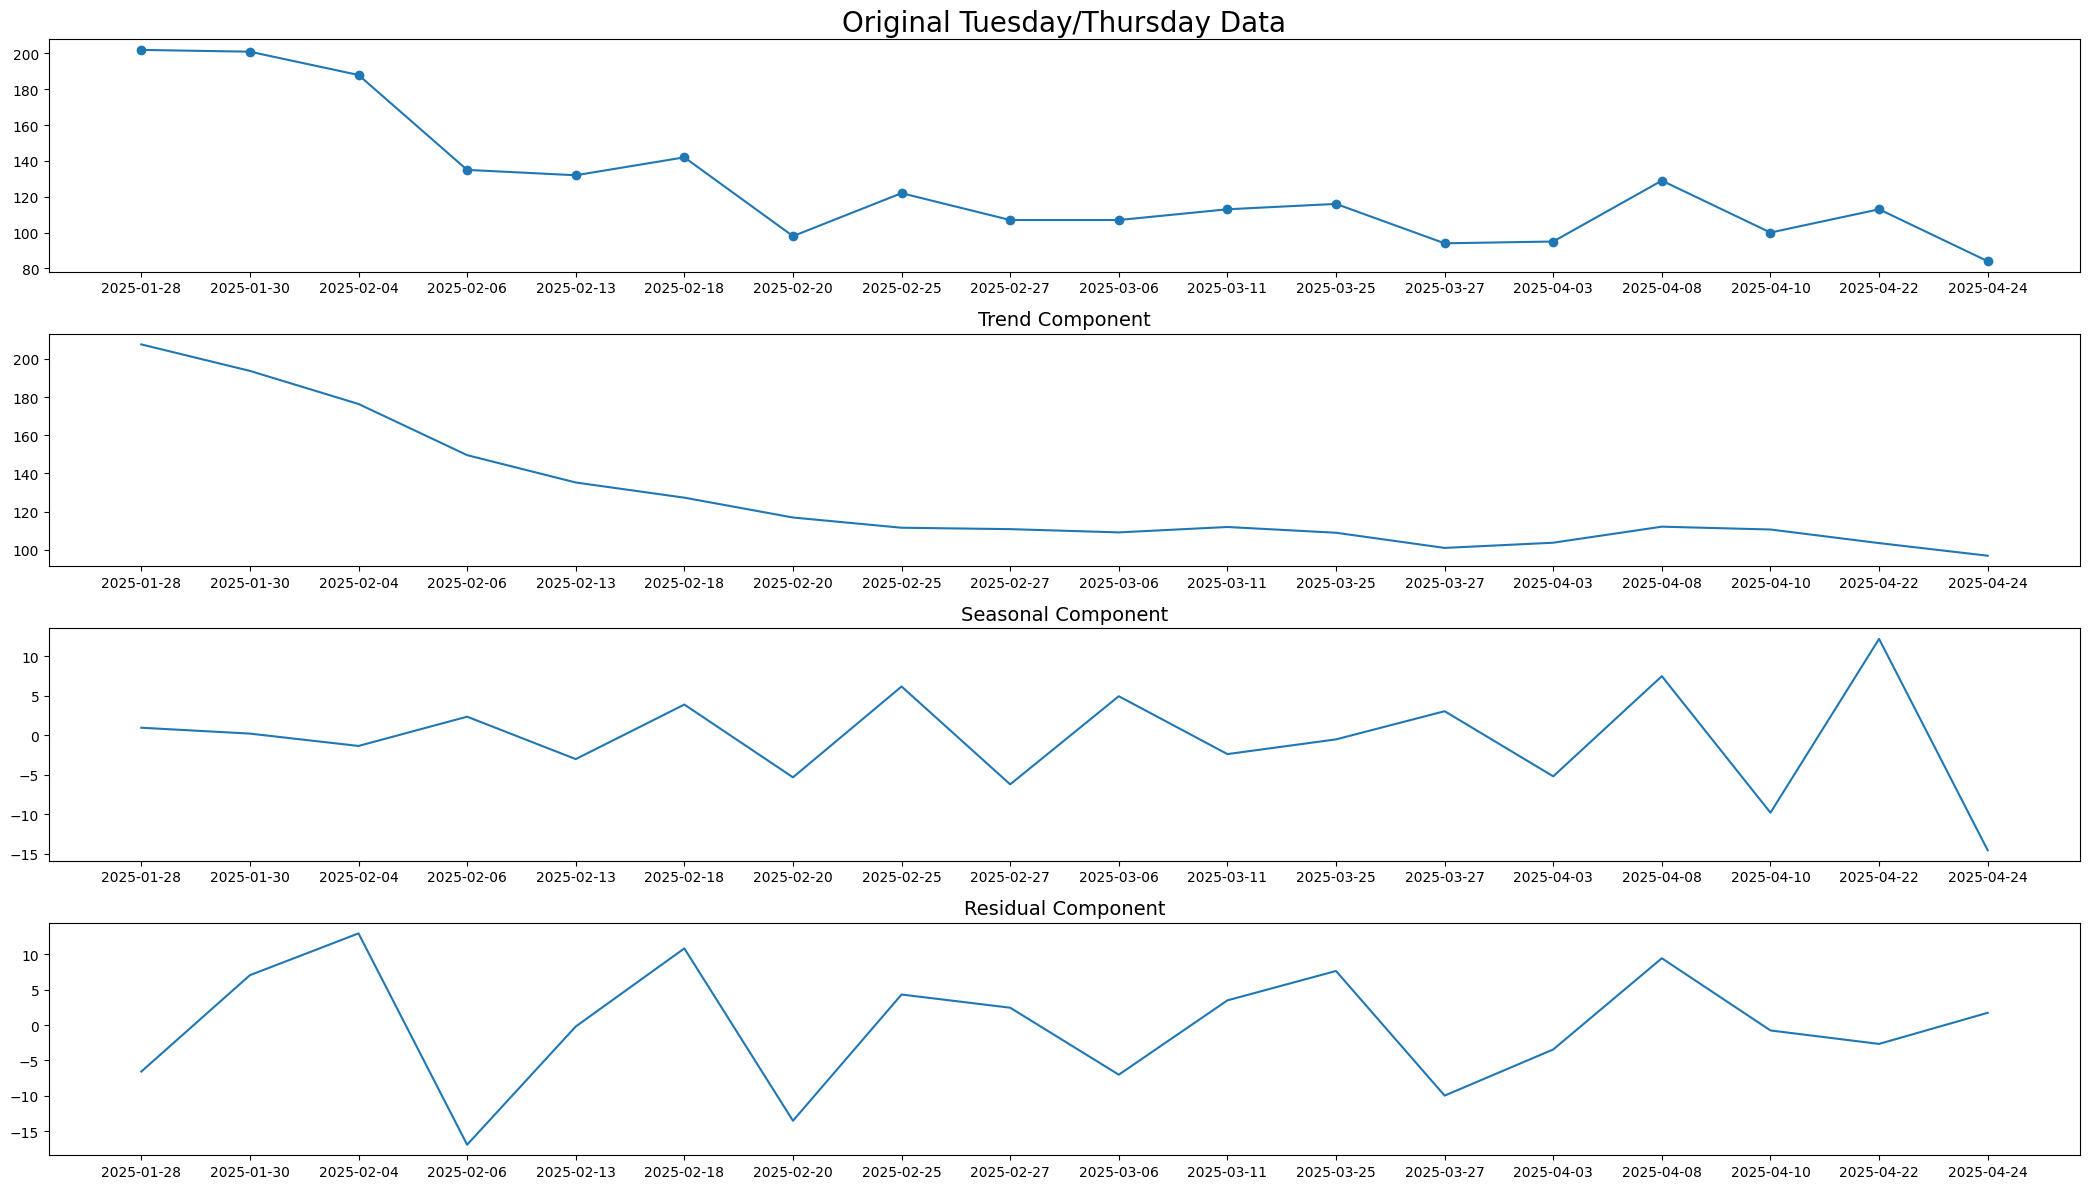

In [ ]:
ttstl = STL(ttcounts, period=2)
ttresult = ttstl.fit()

tttrend = ttresult.trend
ttseasonal = ttresult.seasonal
ttresidual = ttresult.resid

plt.figure(figsize=(21, 12))
plt.subplot(4, 1, 1)
plt.plot(ttdates,ttcounts)
plt.scatter(ttdates,ttcounts)
plt.title('Original Tuesday/Thursday Data', fontsize=20)
plt.subplot(4, 1, 2)
plt.plot(ttdates,tttrend)
plt.title('Trend Component', fontsize=14)
plt.subplot(4, 1, 3)
plt.plot(ttdates,ttseasonal)
plt.title('Seasonal Component', fontsize=14)
plt.subplot(4, 1, 4)
plt.plot(ttdates,ttresidual)
plt.title('Residual Component', fontsize=14)
plt.tight_layout()
plt.show()

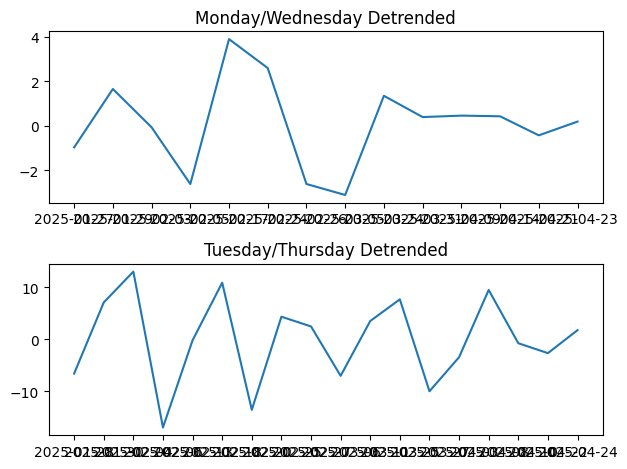

In [ ]:
mwdata = mwcounts - mwtrend - mwseasonal
ttdata = ttcounts - tttrend - ttseasonal
plt.subplot(2,1,1)
plt.plot(mwdates, mwdata)
plt.title('Monday/Wednesday Detrended')
plt.subplot(2,1,2)
plt.plot(ttdates, ttdata)
plt.title('Tuesday/Thursday Detrended')
plt.tight_layout()
plt.show()

In [ ]:
cols = ['max_temp', 'min_temp', 'avg_temp',
       'temp_departure', 'HDD', 'CDD', 'precipitation', 'new_snow']

# Monday Wednesday
for col in cols:
  feature = df[col][df['type'] == 'small']

  print("Feautre:", col)
  correlation = np.corrcoef(mwdata, feature)[0, 1]
  print("\nPearson:")
  print("Correlation:", correlation)

  corr, p_value = spearmanr(mwdata, feature)
  print("\nSpearman:")
  print("Correlation:", corr)
  print("p-value:", p_value)

  print("-----------------------------------------")

Feautre: max_temp

Pearson:
Correlation: -0.13207368358552107

Spearman:
Correlation: -0.17841452971808622
p-value: 0.5416926760080738
-----------------------------------------
Feautre: min_temp

Pearson:
Correlation: -0.045699807696239915

Spearman:
Correlation: -0.07513926833493687
p-value: 0.7984967414208063
-----------------------------------------
Feautre: avg_temp

Pearson:
Correlation: -0.09357273413383191

Spearman:
Correlation: -0.12321239579055618
p-value: 0.6747473852568351
-----------------------------------------
Feautre: temp_departure

Pearson:
Correlation: -0.17649353156836858

Spearman:
Correlation: -0.2967032967032967
p-value: 0.30296672383870205
-----------------------------------------
Feautre: HDD

Pearson:
Correlation: 0.10997899647326591

Spearman:
Correlation: 0.1409695049624385
p-value: 0.6307331265646989
-----------------------------------------
Feautre: CDD

Pearson:
Correlation: 0.04494967034896129

Spearman:
Correlation: 0.03440104580768908
p-value: 0.90705

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-157-bb38135bde08>:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(mwdata, feature)


In [ ]:
# Tuesday Thursday
for col in cols:
  feature = df[col][df['type'] == 'big']

  print("Feautre:", col)
  correlation = np.corrcoef(ttdata, feature)[0, 1]
  print("\nPearson:")
  print("Correlation:", correlation)

  corr, p_value = spearmanr(ttdata, feature)
  print("\nSpearman:")
  print("Correlation:", corr)
  print("p-value:", p_value)

  print("-----------------------------------------")

Feautre: max_temp

Pearson:
Correlation: 0.2553132143270768

Spearman:
Correlation: 0.11582237802498346
p-value: 0.6471962553399957
-----------------------------------------
Feautre: min_temp

Pearson:
Correlation: 0.05052002326477223

Spearman:
Correlation: -0.03519685710239109
p-value: 0.8897272747814051
-----------------------------------------
Feautre: avg_temp

Pearson:
Correlation: 0.18335450006694698

Spearman:
Correlation: 0.09029726776948771
p-value: 0.7215972451526986
-----------------------------------------
Feautre: temp_departure

Pearson:
Correlation: 0.21150993698020742

Spearman:
Correlation: 0.21476512929146582
p-value: 0.3921036534537221
-----------------------------------------
Feautre: HDD

Pearson:
Correlation: -0.17891666944890444

Spearman:
Correlation: -0.0924213162180719
p-value: 0.715303610003766
-----------------------------------------
Feautre: CDD

Pearson:
Correlation: nan

Spearman:
Correlation: nan
p-value: nan
-----------------------------------------
F

<ipython-input-158-c56a74534e03>:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(ttdata, feature)


**Notable Results:**

MW:
* medium POSITIVE correlation with preceipitation (~0.55). p-val = 0.059. Weird.
* -0.2 with temp_departure(weird). not significant

TT:
* -0.45 with new_snow. cool, not significant.
* -0.35 with precipitation. not significant.
* pearson_r = 0.25 with max_temp. not significant.
* 0.22 with temp_departure(weird). not significant.


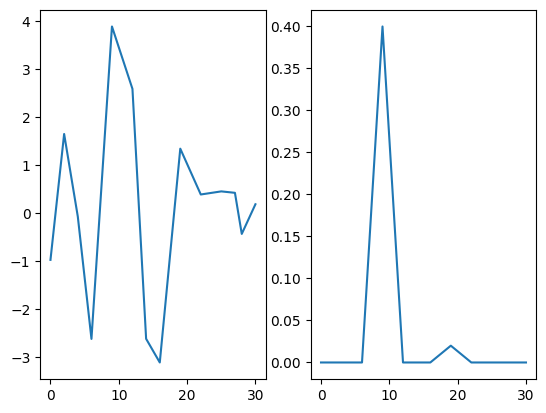

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(mwdata)
plt.subplot(1, 2, 2)
plt.plot(df['precipitation'][df['type'] == 'small'])

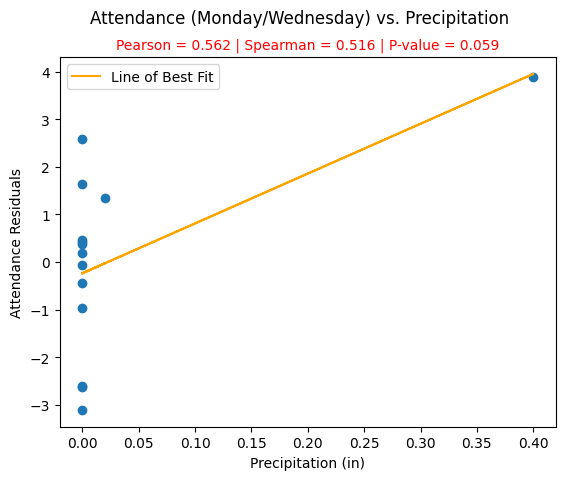

In [ ]:
mwprecipitation = df['precipitation'][df['type'] == 'small']
m, b = np.polyfit(mwprecipitation, mwdata, 1)
y_pred = m * mwprecipitation + b

plt.scatter(mwprecipitation, mwdata)
plt.plot(mwprecipitation, y_pred, color='orange', label='Line of Best Fit')

plt.suptitle('Attendance (Monday/Wednesday) vs. Precipitation')
plt.title('Pearson = 0.562 | Spearman = 0.516 | P-value = 0.059', color = 'red', fontsize = 10)
plt.ylabel('Attendance Residuals')
plt.xlabel('Precipitation (in)')
plt.legend()

plt.show()

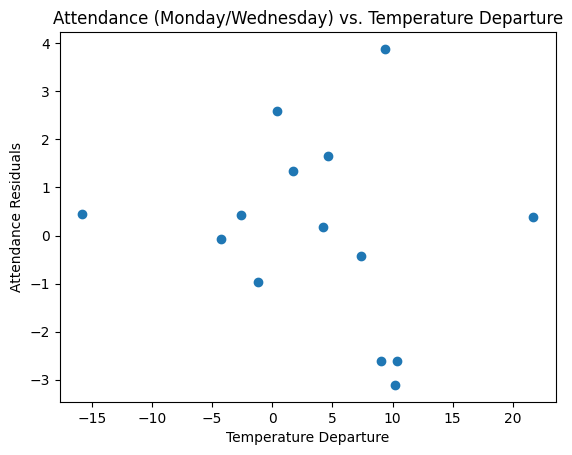

In [ ]:
mwtempdep = df['temp_departure'][df['type'] == 'small']

plt.scatter(mwtempdep, mwdata)

plt.title('Attendance (Monday/Wednesday) vs. Temperature Departure')
plt.ylabel('Attendance Residuals')
plt.xlabel('Temperature Departure')

plt.show()

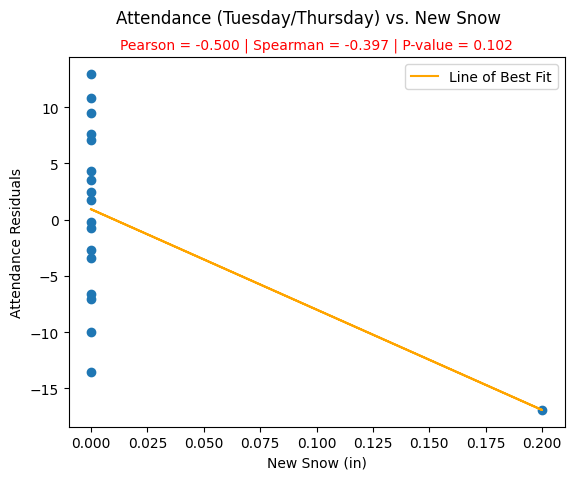

In [ ]:
ttsnow = df['new_snow'][df['type'] == 'big']
m, b = np.polyfit(ttsnow, ttdata, 1)
y_pred = m * ttsnow + b

plt.scatter(ttsnow, ttdata)
plt.plot(ttsnow, y_pred, color='orange', label='Line of Best Fit')

plt.suptitle('Attendance (Tuesday/Thursday) vs. New Snow')
plt.title('Pearson = -0.500 | Spearman = -0.397 | P-value = 0.102', color = 'red', fontsize = 10)
plt.ylabel('Attendance Residuals')
plt.xlabel('New Snow (in)')
plt.legend()

plt.show()

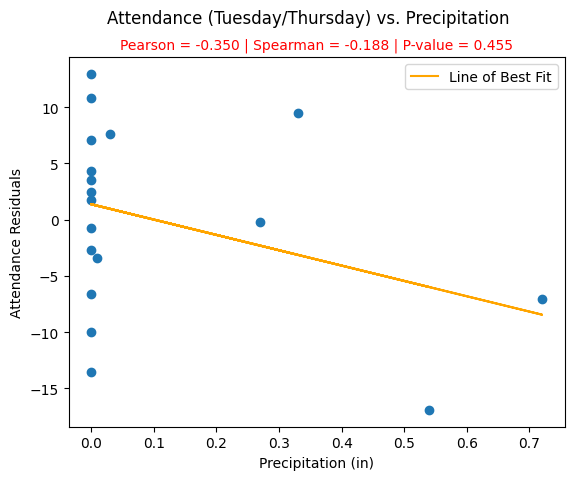

In [ ]:
ttprecipitation = df['precipitation'][df['type'] == 'big']
m, b = np.polyfit(ttprecipitation, ttdata, 1)
y_pred = m * ttprecipitation + b

plt.scatter(ttprecipitation, ttdata)
plt.plot(ttprecipitation, y_pred, color='orange', label='Line of Best Fit')

plt.suptitle('Attendance (Tuesday/Thursday) vs. Precipitation')
plt.title('Pearson = -0.350 | Spearman = -0.188 | P-value = 0.455', color = 'red', fontsize = 10)
plt.ylabel('Attendance Residuals')
plt.xlabel('Precipitation (in)')
plt.legend()

plt.show()

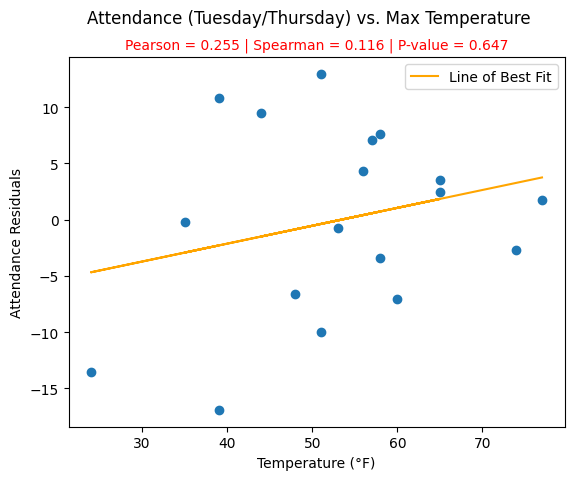

In [ ]:
ttmaxtemp = df['max_temp'][df['type'] == 'big']
m, b = np.polyfit(ttmaxtemp, ttdata, 1)
y_pred = m * ttmaxtemp + b

plt.scatter(ttmaxtemp, ttdata)
plt.plot(ttmaxtemp, y_pred, color='orange', label='Line of Best Fit')

plt.suptitle('Attendance (Tuesday/Thursday) vs. Max Temperature')
plt.title('Pearson = 0.255 | Spearman = 0.116 | P-value = 0.647', color = 'red', fontsize = 10)
plt.ylabel('Attendance Residuals')
plt.xlabel('Temperature (°F)')
plt.legend()

plt.show()

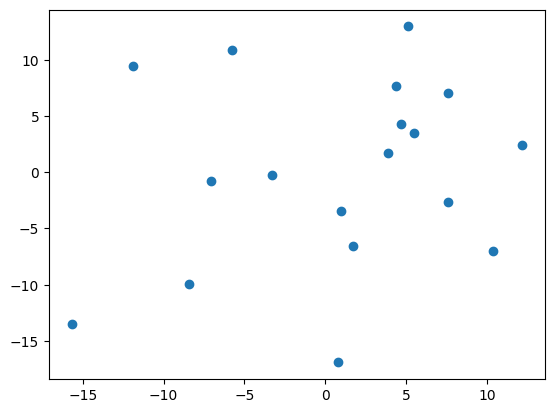

In [ ]:
plt.scatter(df['temp_departure'][df['type'] == 'big'], ttdata)